## Factors in private companies' growth

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [72]:
sns.set_style(style='whitegrid')

In [73]:
# Read cleaned data
ind_df = pd.read_csv('inc_cleaned_data.csv', sep='|')

In [74]:
ind_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA


---

Calculate previous revenue for companies based on on current revenue and growth values. Create separate column prev_revenue in dataframe.

In [75]:
ind_df.loc[:,('prev_revenue')] = ind_df.apply(lambda x: (100/(x['growth']+100)) * x['revenue'], axis=1).values

In [76]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 10 columns):
rank            4997 non-null int64
name            4997 non-null object
revenue         4997 non-null float64
industry        4993 non-null object
employees       4861 non-null float64
founded         4994 non-null float64
growth          4997 non-null int64
city            4996 non-null object
state           4997 non-null object
prev_revenue    4997 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 390.5+ KB


In [77]:
ind_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state,prev_revenue
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA,0.108056
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX,0.103415
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA,0.143020
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA,0.125123
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA,0.233321


---

Evaluate state-wise revenues of 2016 and 2013 i.e. current and previous revenues.

In [78]:
ind_df.groupby('industry').sum().sort_values(by='revenue', ascending=False)[['revenue','prev_revenue']]

,revenue,prev_revenue
industry,,
Financial Services,43175.9,22145.623016
Health,24568.8,10757.583275
Business Products & Services,19019.4,10261.731704
IT Services,15365.7,7241.802319
Construction,13009.3,6022.320729
Logistics & Transportation,12832.9,6601.203021
Consumer Products & Services,12296.3,5071.512327
Human Resources,12020.7,5645.312366
Government Services,10835.8,4552.813687


---

### Industry-wise growth in %

In [79]:
ind_percent = ind_df.groupby('industry').apply(lambda x: ((x['revenue'].sum()-x['prev_revenue'].sum())/x['prev_revenue'].sum())*100).sort_values(ascending=False)
ind_percent

industry
Travel & Hospitality            200.920256
Media                           197.121897
Energy                          174.245285
Security                        171.343674
Real Estate                     167.822429
Telecommunications              165.427249
Advertising & Marketing         153.654136
Education                       152.470708
Consumer Products & Services    142.458249
Food & Beverage                 141.674652
Government Services             138.002272
Software                        134.207695
Environmental Services          130.773838
Retail                          130.313610
Health                          128.385869
Computer Hardware               117.000705
Construction                    116.018053
Human Resources                 112.932416
Insurance                       112.460202
IT Services                     112.180605
Engineering                      99.841377
Financial Services               94.963583
Logistics & Transportation       94.402444
Ma

---

### Number of companies from each industry in inc 5000 list.

In [80]:
ind_df['industry'].value_counts()

IT Services                     598
Advertising & Marketing         493
Business Products & Services    474
Health                          395
Software                        328
Construction                    301
Financial Services              262
Government Services             240
Consumer Products & Services    239
Real Estate                     197
Human Resources                 186
Retail                          168
Logistics & Transportation      149
Manufacturing                   145
Food & Beverage                 137
Energy                           91
Insurance                        89
Telecommunications               86
Education                        74
Security                         68
Engineering                      67
Media                            65
Travel & Hospitality             63
Environmental Services           42
Computer Hardware                36
Name: industry, dtype: int64

Number of companies from each industry in inc 5000 list : Pie Chart.

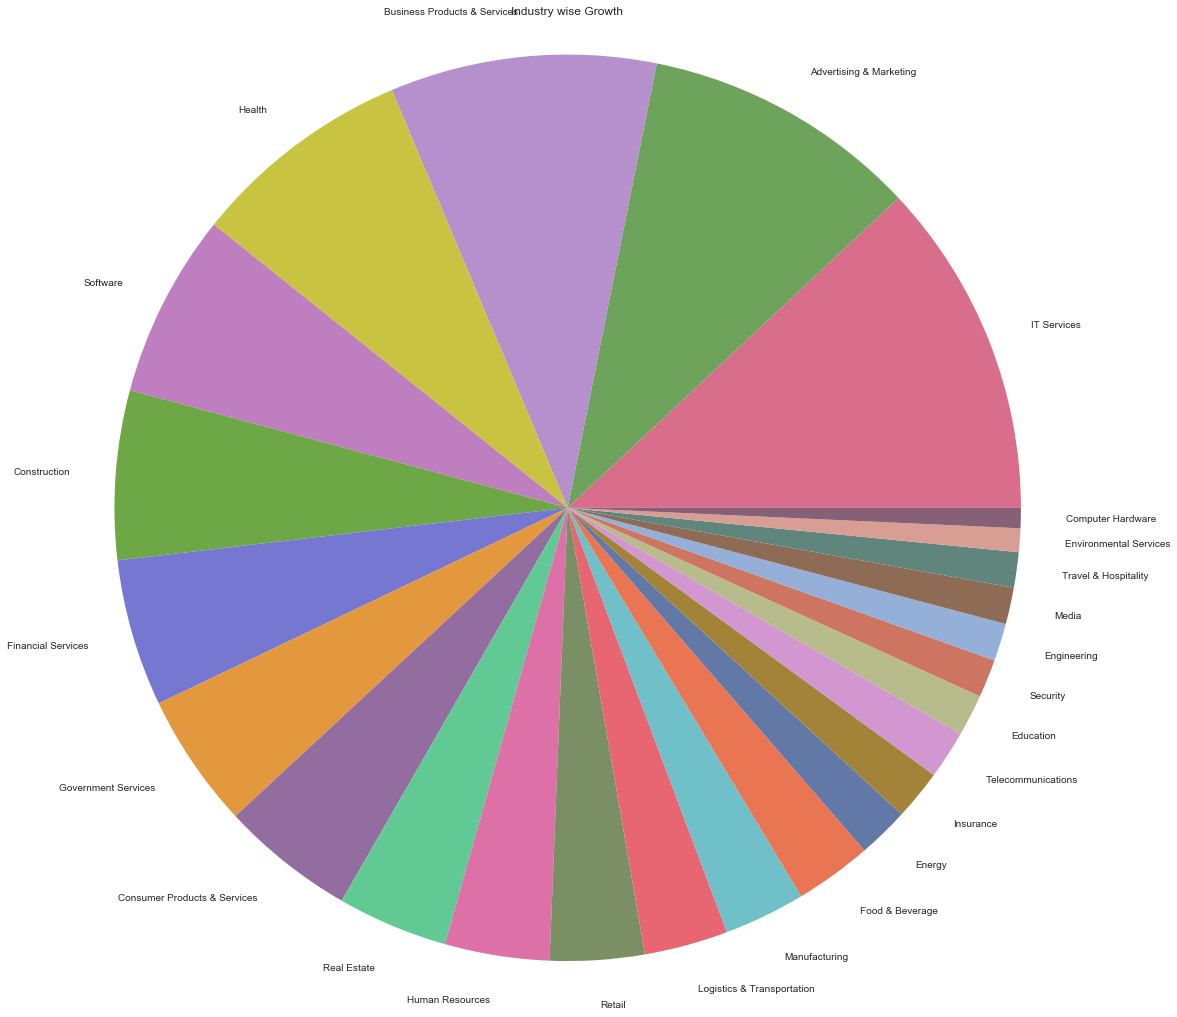

In [81]:
fig, ax = plt.subplots(figsize=(14,14))
ax.set_prop_cycle(color=["#d96d8c",
"#6ea35c",
"#b68fcd",
"#c8c441",
"#be7ebf",
"#6da746",
"#7677d1",
"#e3983e",
"#936da0",
"#61c994",
"#dc70a7",
"#7a9064",
"#e86572",
"#6fc0c8",
"#e97553",
"#6279a8",
"#a38338",
"#d296d1",
"#b8bb8c",
"#cd7560",
"#94afd8",
"#8e6b55",
"#60857c",
"#d89e94",
"#866077"])
ind_growth = ind_df['industry'].value_counts()
ax.pie(ind_growth, labels=ind_growth.index)
ax.axis('equal')
ax.set_title('Industry wise Growth')
plt.tight_layout()


---

### Categorizing Industries into growth tiers.

In [82]:
# table/dataframe to categorize industries according to growth with window of 25%
ind_tier_table = pd.DataFrame() #created empty dataframe

In [83]:
ind_tier_table['175-200'] = np.append(ind_percent[ind_percent.values > 175].index.values, [" "]*5)
ind_tier_table['150-175'] = np.append(ind_percent[(ind_percent.values > 150) & (ind_percent.values < 175)].index.values, [" "])
ind_tier_table['125-150'] = ind_percent[(ind_percent.values > 125) & (ind_percent.values < 150)].index
ind_tier_table['100-125'] = np.append(ind_percent[(ind_percent.values > 100) & (ind_percent.values < 125)].index.values, [" "]*2)
ind_tier_table['0-100'] = np.append(ind_percent[(ind_percent.values > 0) & (ind_percent.values < 100)].index.values, [" "]*2)

In [84]:
ind_tier_table

,175-200,150-175,125-150,100-125,0-100
0,Travel & Hospitality,Energy,Consumer Products & Services,Computer Hardware,Engineering
1,Media,Security,Food & Beverage,Construction,Financial Services
2,,Real Estate,Government Services,Human Resources,Logistics & Transportation
3,,Telecommunications,Software,Insurance,Manufacturing
4,,Advertising & Marketing,Environmental Services,IT Services,Business Products & Services
5,,Education,Retail,,
6,,,Health,,


---

### No. of Employees vs Growth

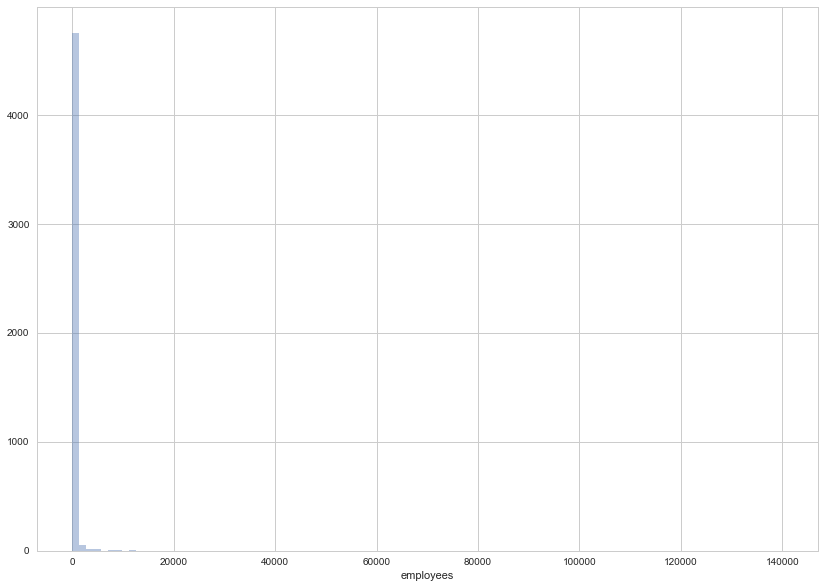

In [85]:
# check distribution of number of employees
plt.figure(figsize=(14,10))
sns.distplot(ind_df['employees'].dropna(), kde=False, bins=100)

Looks like most of the companies are of size under 1000 or 500.

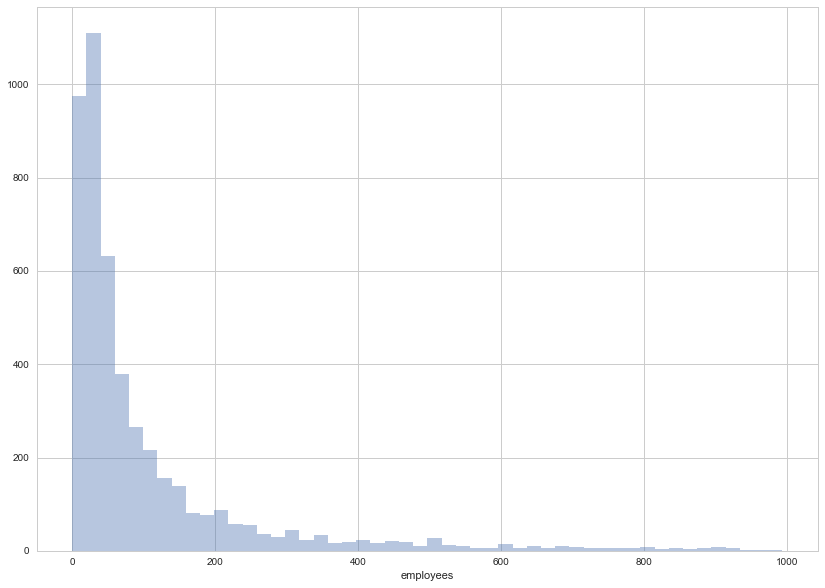

In [86]:
plt.figure(figsize=(14,10))
sns.distplot(ind_df[ind_df['employees'] < 1000]['employees'].dropna(), kde=False, bins=50)

In [87]:
# Companies of size under or equal to 10
len(ind_df[ind_df['employees'] <= 10])

349

In [88]:
# Companies of size under or equal to 50
len(ind_df[ind_df['employees'] <= 50])

2507

More than half of the companies in list have less than or equal to 50 employees

In [89]:
# Companies of size under or equal to 500
len(ind_df[ind_df['employees'] <= 500])

4534

In [90]:
len(ind_df[(ind_df['employees'] > 500) & (ind_df['employees'] <= 1000)])

182

In [91]:
len(ind_df[(ind_df['employees'] > 1000) & (ind_df['employees'] <= 10000)])

133

In [92]:
len(ind_df[ind_df['employees'] > 10000])

12

More than 90 percent of the companies have less than or equal to 500 employees. Companies can be categorized under 3 categories based on number of employees.
1. 0 to 50
2. 50 to 500
3. more than 500

In [93]:
x = ['< 50', '50 - 500', '> 500']
y = [len(ind_df[ind_df['employees'] <= 50]), len(ind_df[(ind_df['employees'] > 50) & (ind_df['employees'] <= 500)]), len(ind_df[ind_df['employees'] > 500])]

In [94]:
emp_num_df = pd.DataFrame(y, index=x, columns=['No_of_Companies'])
emp_num_df.index.name = 'Company_Size'

In [95]:
emp_num_df

,No_of_Companies
Company_Size,
< 50,2507
50 - 500,2027
> 500,327


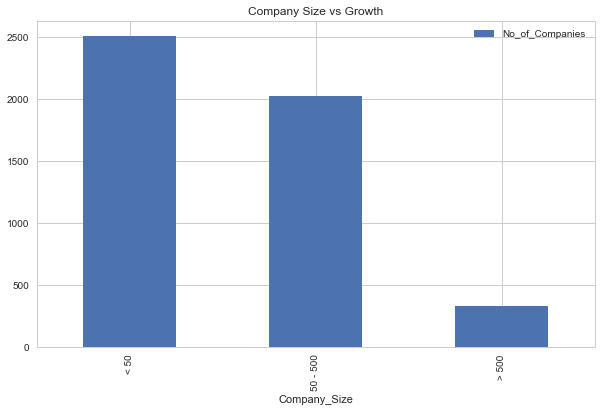

In [96]:

emp_num_df.plot(kind='bar', title='Company Size vs Growth', figsize=(10,6))

---

### Average founding year for each industry

In [97]:
ind_df.groupby('industry').mean().sort_values(by='founded', ascending=False)['founded']

industry
Computer Hardware               2005.555556
Media                           2005.461538
Energy                          2005.351648
Advertising & Marketing         2005.247465
Retail                          2005.244048
Software                        2005.179878
Real Estate                     2005.055838
Travel & Hospitality            2005.015873
Government Services             2004.741667
Health                          2004.601523
Security                        2004.470588
IT Services                     2004.342809
Consumer Products & Services    2004.305439
Education                       2004.189189
Food & Beverage                 2003.810219
Logistics & Transportation      2003.570470
Financial Services              2002.720307
Human Resources                 2002.650538
Telecommunications              2001.313953
Business Products & Services    2000.964135
Insurance                       1999.886364
Construction                    1999.438538
Environmental Services 

In [98]:
ind_df.groupby('industry').describe()['founded'].sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Manufacturing,145.0,1993.917241,20.475088,1895.0,1990.00,2000.0,2007.0,2013.0
Engineering,67.0,1996.417910,15.149907,1953.0,1990.50,2002.0,2007.5,2013.0
Environmental Services,42.0,1999.333333,14.569709,1936.0,1994.00,2002.5,2008.0,2012.0
Construction,301.0,1999.438538,14.301994,1921.0,1992.00,2004.0,2010.0,2013.0
Insurance,88.0,1999.886364,17.845075,1869.0,1996.00,2005.0,2008.0,2013.0
Business Products & Services,474.0,2000.964135,17.533802,1840.0,1999.00,2005.0,2010.0,2013.0
Telecommunications,86.0,2001.313953,8.035600,1970.0,1999.00,2002.0,2006.0,2013.0
Human Resources,186.0,2002.650538,9.192325,1947.0,1999.00,2004.5,2009.0,2013.0
Financial Services,261.0,2002.720307,10.216236,1933.0,2000.00,2006.0,2009.0,2013.0


In [136]:
# number of companies founded before 1990
len(ind_df[ind_df['founded']<=1990])

437

In [137]:
# number of companies founded between 1990 and 2010
len(ind_df[(ind_df['founded']<=2010) & (ind_df['founded']>1990)])

3580

In [138]:
# number of companies founded after 2010
len(ind_df[ind_df['founded']>2010])

977

In [139]:
437+3580+977

4994

In [140]:
# avg growth in companies founded before 1990
rev1, prev1 = ind_df[ind_df['founded']<=1990].sum()[['revenue','prev_revenue']]
growth1 = ((rev1 - prev1)/prev1)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth1, rev1, prev1))

percent growth: 84.18169465868372	revenue: 40795.9	previous revenue: 22149.812485763538


In [141]:
# avg growth in companies founded between 1990 and 2010
rev2, prev2 = ind_df[(ind_df['founded']<=2010) & (ind_df['founded']>1990)].sum()[['revenue','prev_revenue']]
growth2 = ((rev2 - prev2)/prev2)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth2, rev2, prev2))

percent growth: 125.73586647365838	revenue: 150322.7999999996	previous revenue: 66592.34190307153


In [142]:
# avg growth in companies founded after 2010
rev3, prev3 = ind_df[ind_df['founded']>2010].sum()[['revenue','prev_revenue']]
growth3 = ((rev3 - prev3)/prev3)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth3, rev3, prev3))

percent growth: 125.0841198897658	revenue: 41250.20000000001	previous revenue: 18326.570537362724


More than 90% companies in list were founded before 1990. Almost 20% were founded after 2010. 

---

### Revenue vs Growth

Distribution of revenue of companies in list:

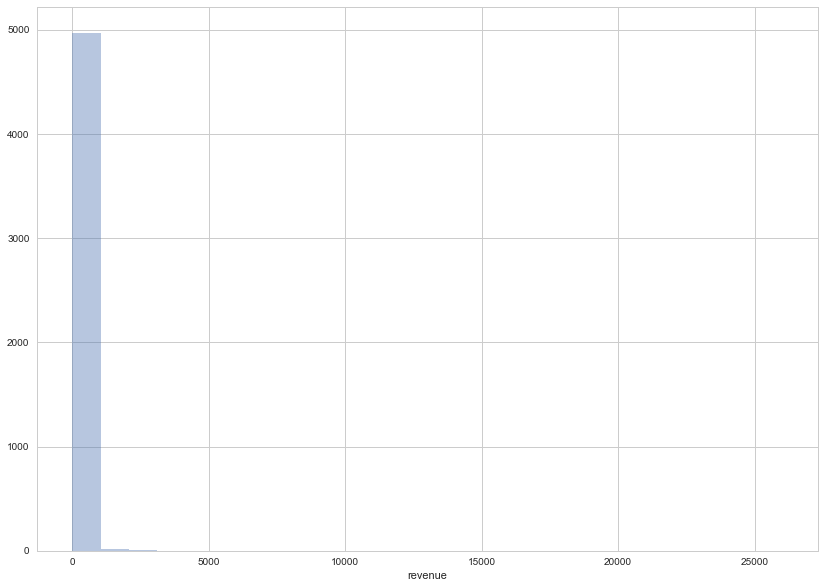

In [99]:
plt.figure(figsize=(14,10))
sns.distplot(ind_df['revenue'], kde=False, bins=25)

Almost companies are under USD 1 billion.

In [100]:
# Companies with revenue under 1 billion USD.
len(ind_df[ind_df['revenue']<1000])

4970

99.4 % companies have less than 1 billion USD revenue. 

In [111]:
# Companies with revenue under 200 million USD.
len(ind_df[ind_df['revenue']<200])

4833

In [101]:
# Maximum revenue for a company
ind_df['revenue'].max()

26011.700000000001

In [102]:
# Companies with above billion USD revenue.
len(ind_df[ind_df['revenue']>=1000])

27

Analyze affect of revenue on growth for under-billion companies

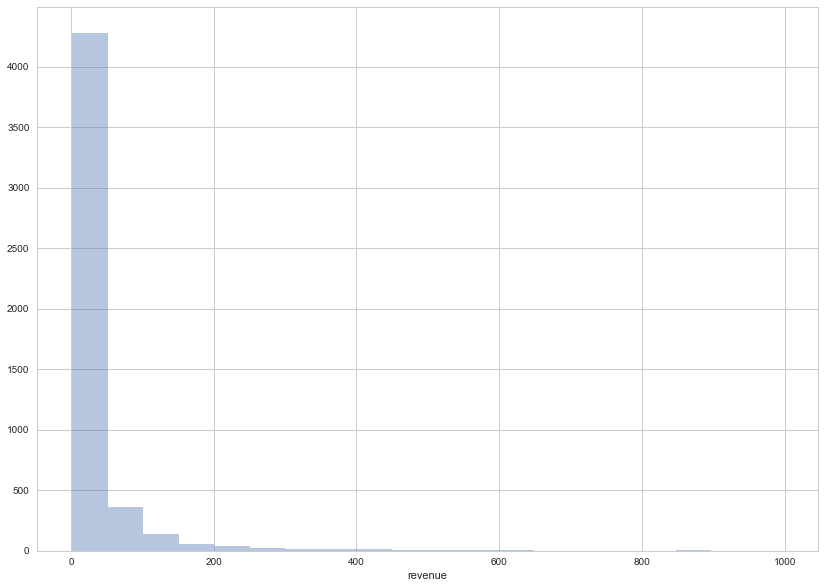

In [107]:
plt.figure(figsize=(14,10))
sns.distplot(ind_df[ind_df['revenue']<1000]['revenue'], kde=False, bins=20)

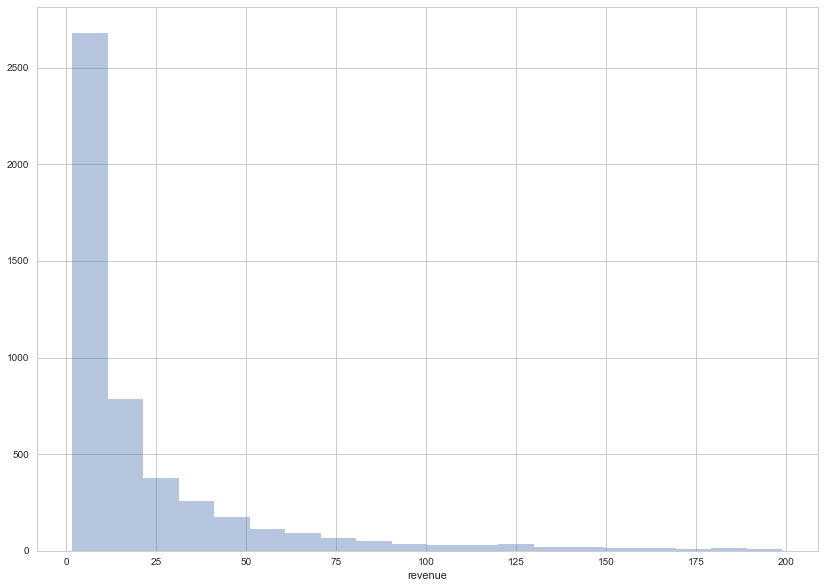

In [112]:
plt.figure(figsize=(14,10))
sns.distplot(ind_df[ind_df['revenue']<200]['revenue'], kde=False, bins=20)

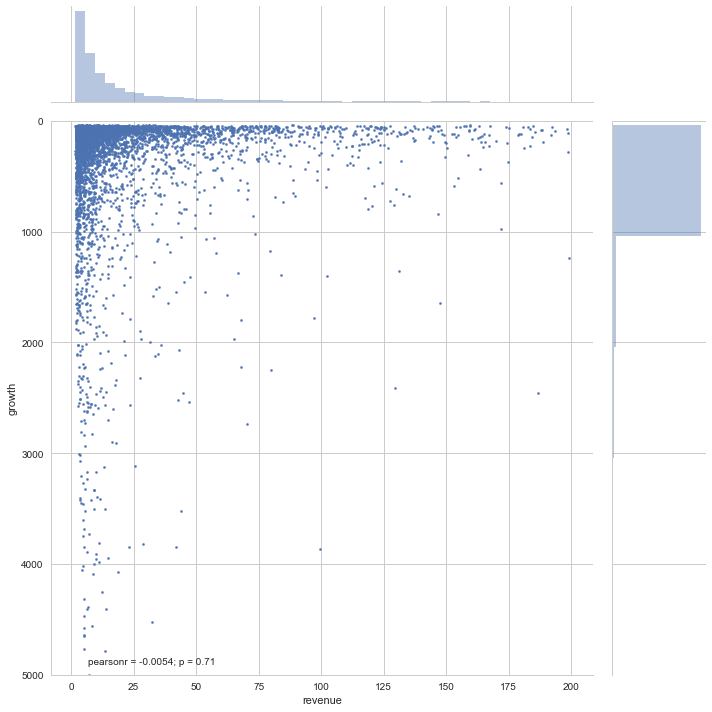

In [135]:
rev_df = ind_df[ind_df['revenue']<200]
sns.jointplot(rev_df['revenue'], rev_df['growth'], kind='scatter', ylim=5000, size=10, joint_kws={"s": 5})

As expected, Companies with less revenue are more likely to show higher growth. 